Activation function: Sigmoid
Accuracy: 75.00%
Final Loss: 0.1191


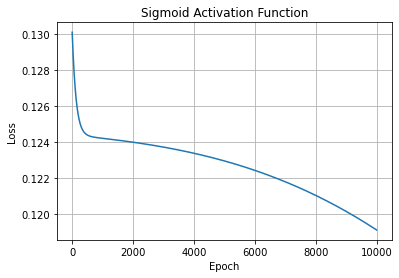

Activation function: Tanh
Accuracy: 50.00%
Final Loss: 0.1248


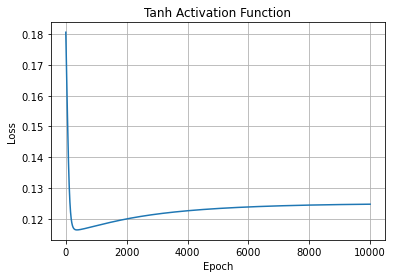

C:\Users\abiiy\AppData\Local\Temp/ipykernel_18036/1452518304.py:69: RuntimeWarning: invalid value encountered in multiply
  delta1 = np.dot(delta2, self.W2.T) * self.activation_derivative(a1)


Activation function: ReLU
Accuracy: 50.00%
Final Loss: nan


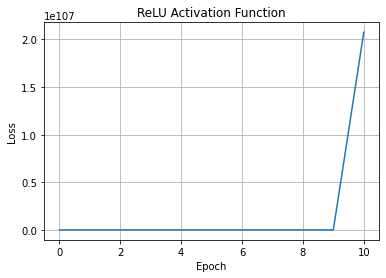

Activation function: Step
Accuracy: 50.00%
Final Loss: 0.2500


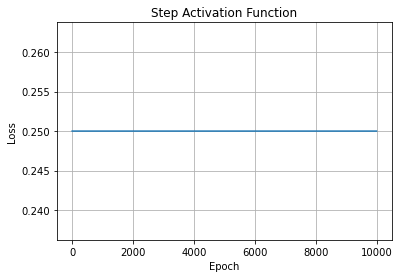


Detailed Step-by-Step Output:
Input: [0 0]
Expected Output: [0]
Hidden Layer Pre-Activation (z1): [[ 0.5 -0.5]]
Hidden Layer Activation (a1): [[1. 0.]]
Output Layer Pre-Activation (z2): [[1.]]
Predicted Output: [[0.73105858]]
----------------------------------------
Input: [0 1]
Expected Output: [1]
Hidden Layer Pre-Activation (z1): [[ 1. -1.]]
Hidden Layer Activation (a1): [[1. 0.]]
Output Layer Pre-Activation (z2): [[1.]]
Predicted Output: [[0.73105858]]
----------------------------------------
Input: [1 0]
Expected Output: [1]
Hidden Layer Pre-Activation (z1): [[ 1. -1.]]
Hidden Layer Activation (a1): [[1. 0.]]
Output Layer Pre-Activation (z2): [[1.]]
Predicted Output: [[0.73105858]]
----------------------------------------
Input: [1 1]
Expected Output: [0]
Hidden Layer Pre-Activation (z1): [[ 1.5 -1.5]]
Hidden Layer Activation (a1): [[1. 0.]]
Output Layer Pre-Activation (z2): [[1.]]
Predicted Output: [[0.73105858]]
----------------------------------------


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Define the activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def step_function(x):
    return (x > 0).astype(float)

def step_function_derivative(x):
    return np.zeros_like(x) # The derivative of the step function is 0 almost everywhere

# Define the MLP class
class MLP:
    def __init__(self, X, y, hidden_size, activation, activation_derivative, epochs=10000, lr=0.01):
        self.X = X
        self.y = y
        self.hidden_size = hidden_size
        self.activation = activation
        self.activation_derivative = activation_derivative
        self.epochs = epochs
        self.lr = lr

        # Set exact weights and biases
        self.W1 = np.array([[0.5, -0.5], [0.5, -0.5]], dtype=np.float64)
        self.b1 = np.array([[0.5, -0.5]], dtype=np.float64)
        self.W2 = np.array([[1], [-1]], dtype=np.float64)
        self.b2 = np.array([[0]], dtype=np.float64)

        # Training loop
        self.losses = []
        for _ in range(self.epochs):
            loss, a1, a2 = self.forward()
            self.backward(a1, a2)
            self.update()
            self.losses.append(loss)

    def forward(self):
        # Hidden layer
        z1 = np.dot(self.X, self.W1) + self.b1
        a1 = self.activation(z1)

        # Output layer
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = self.activation(z2)

        # Compute loss
        loss = 0.5 * np.mean((self.y - a2)**2)
        return loss, a1, a2

    def backward(self, a1, a2):
        delta2 = (self.y - a2) * sigmoid_derivative(a2)
        delta1 = np.dot(delta2, self.W2.T) * self.activation_derivative(a1)
        self.dW2 = np.dot(a1.T, delta2)
        self.db2 = np.sum(delta2, axis=0, keepdims=True)
        self.dW1 = np.dot(self.X.T, delta1)
        self.db1 = np.sum(delta1, axis=0, keepdims=True)

    def update(self):
        self.W1 += self.lr * self.dW1
        self.b1 += self.lr * self.db1
        self.W2 += self.lr * self.dW2
        self.b2 += self.lr * self.db2

    def predict(self, X):
        z1 = np.dot(X, self.W1) + self.b1
        a1 = self.activation(z1)
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = sigmoid(z2)
        return (a2 > 0.5).astype(int)

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Activation functions and their derivatives
activation_functions = {
    'Sigmoid': (sigmoid, sigmoid_derivative),
    'Tanh': (tanh, tanh_derivative),
    'ReLU': (relu, relu_derivative),
    'Step': (step_function, step_function_derivative)
}

# Train and evaluate MLP with each activation function
for name, (activation, activation_derivative) in activation_functions.items():
    mlp = MLP(X, y, hidden_size=2, activation=activation, activation_derivative=activation_derivative, epochs=10000)
    predictions = mlp.predict(X)
    accuracy = 100 * (1 - np.mean(np.abs(y - predictions)))
    final_loss = mlp.losses[-1]

    print(f"Activation function: {name}")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Final Loss: {final_loss:.4f}")

    # Plot loss over epochs
    plt.figure()
    plt.plot(mlp.losses)
    plt.title(f"{name} Activation Function")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

# Print detailed step-by-step output
print("\nDetailed Step-by-Step Output:")
for i in range(len(X)):
    input_data = X[i]
    expected_output = y[i]
    z1 = np.dot(input_data, mlp.W1) + mlp.b1
    a1 = activation(z1)
    z2 = np.dot(a1, mlp.W2) + mlp.b2
    predicted_output = sigmoid(z2)

    print(f"Input: {input_data}")
    print(f"Expected Output: {expected_output}")
    print(f"Hidden Layer Pre-Activation (z1): {z1}")
    print(f"Hidden Layer Activation (a1): {a1}")
    print(f"Output Layer Pre-Activation (z2): {z2}")
    print(f"Predicted Output: {predicted_output}")
    print("-" * 40)
